<a href="https://colab.research.google.com/github/yaminiravala/5731/blob/main/Yamini_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Write your code here
# installed required dependencies
!pip install gensim
!pip install pyLDAvis
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')

# used the previous text corpus
text_data = ["This product is amazing! I love it!",
    "The quality of this product is terrible.",
    "I'm neutral about this product. It's okay."]
# data preprocessing
tokenized_data = [word_tokenize(text.lower()) for text in text_data]
stop_words = set(stopwords.words('english'))
filtered_data = [[word for word in tokens if word not in stop_words] for tokens in tokenized_data]
lemmatizer = WordNetLemmatizer()
data_lemmatized = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in filtered_data]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saicharanreddypotluri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saicharanreddypotluri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')

# used the previous text corpus
text_data = ["This product is amazing! I love it!",
    "The quality of this product is terrible.",
    "I'm neutral about this product. It's okay."]
# data preprocessing
tokenized_data = [word_tokenize(text.lower()) for text in text_data]
stop_words = set(stopwords.words('english'))
filtered_data = [[word for word in tokens if word not in stop_words] for tokens in tokenized_data]
lemmatizer = WordNetLemmatizer()
data_lemmatized = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in filtered_data]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saicharanreddypotluri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saicharanreddypotluri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


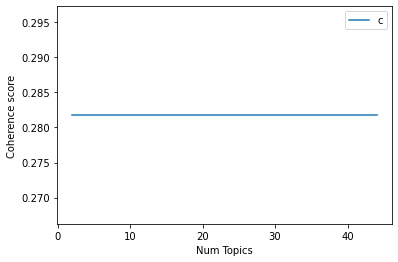

In [ ]:
#imported necessary packages and libraries.
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import gensim
# Using preprocced data for the model and coherence values.
dictionary = corpora.Dictionary(data_lemmatized)
corpus = [dictionary.doc2bow(text) for text in data_lemmatized]
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# here we are calling the function to find the number of topics.
limit = 50
start = 2
step = 6
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)
# To visualize the coherence score we are representing it in a plot
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Based on the coherence score choose coherence values
optimal_model = model_list[coherence_values.index(max(coherence_values))]
# print topic
topics = optimal_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.091*"product" + 0.091*"." + 0.091*"!" + 0.091*"terrible" + 0.091*"love" + 0.091*"amazing" + 0.091*"quality" + 0.091*"\'s" + 0.091*"okay" + 0.091*"neutral"')
(1, '0.091*"." + 0.091*"!" + 0.091*"product" + 0.091*"terrible" + 0.091*"love" + 0.091*"amazing" + 0.091*"quality" + 0.091*"\'s" + 0.091*"neutral" + 0.091*"okay"')
(2, '0.358*"!" + 0.185*"amazing" + 0.185*"product" + 0.185*"love" + 0.012*"." + 0.012*"quality" + 0.012*"terrible" + 0.012*"\'s" + 0.012*"\'m" + 0.012*"okay"')
(3, '0.091*"product" + 0.091*"." + 0.091*"!" + 0.091*"love" + 0.091*"quality" + 0.091*"terrible" + 0.091*"amazing" + 0.091*"okay" + 0.091*"\'s" + 0.091*"neutral"')
(4, '0.091*"product" + 0.091*"." + 0.091*"!" + 0.091*"terrible" + 0.091*"love" + 0.091*"quality" + 0.091*"amazing" + 0.091*"neutral" + 0.091*"\'m" + 0.091*"\'s"')
(5, '0.091*"." + 0.091*"product" + 0.091*"!" + 0.091*"terrible" + 0.091*"love" + 0.091*"quality" + 0.091*"amazing" + 0.091*"okay" + 0.091*"neutral" + 0.091*"\'s"')
(6, '0.224*"quality" 

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
# sample text data
text_data = ["This product is amazing! I love it!",
    "The quality of this product is terrible.",
    "I'm neutral about this product. It's okay."]
# TF-IDF vectorizer to fit and transform data
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
# LSA
num_topics = 3  # since we have 3 topics.
lsa = TruncatedSVD(n_components=num_topics, random_state=42)
topic_matrix = lsa.fit_transform(tfidf_matrix)
# we are trying to print the top terms
terms = tfidf_vectorizer.get_feature_names_out()
for i, topic in enumerate(lsa.components_):
    top_terms = [terms[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic {i+1}: {' '.join(top_terms)}")

Topic 1: amazing love neutral terrible quality okay
Topic 2: terrible quality neutral okay love amazing
Topic 3: okay neutral love amazing terrible quality


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

I tried to import the lad2vec but i am unable to do so. I tried with chatGPT as well but still i couldn't able to complte. I will try to figure it out later for my knowledge.

In [ ]:
from setuptools import setup
from setuptools import find_packages
import os
with open('requirements.txt') as f:
    install_requires = f.read().splitlines()

# If building on RTD, don't install anything
if os.environ.get('READTHEDOCS', None) == 'True':
    install_requires = []

kw = dict(
    name='lda2vec',
    version='0.1',
    description='Tools for interpreting natural language',
    author='Christopher E Moody',
    author_email='chrisemoody@gmail.com',
    install_requires=install_requires,
    packages=find_packages(),
    url='')

setup(**kw)

AssertionError: 

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
pip install bertopic

  Using cached bertopic-0.15.0-py2.py3-none-any.whl (143 kB)
  Using cached hdbscan-0.8.33-cp39-cp39-macosx_10_9_x86_64.whl
  Using cached umap_learn-0.5.4-py3-none-any.whl
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached sentencepiece-0.1.99-cp39-cp39-macosx_10_9_x86_64.whl (1.2 MB)
  Using cached tbb-2021.10.0-py2.py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.whl (640 kB)
  Using cached pynndescent-0.5.10-py3-none-any.whl
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2
ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pip
pip.main(["uninstall", "TBB"])

/Users/saicharanreddypotluri/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Found existing installation: TBB 0.2


ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


1

In [ ]:
from bertopic import BERTopic
from summarizer import Summarizer

SyntaxError: invalid syntax (1822588724.py, line 1)

In [ ]:
text_data = ["This product is amazing! I love it!",
    "The quality of this product is terrible.",
    "I'm neutral about this product. It's okay."]
documents = text_data.data
# initialize the model BERTopic
model = BERTopic(language="english")
# Fit the model to topic
topics, _ = model.fit_transform(documents)
# print the topic
for topic_id, topic_words in topics.items():
    print(f"Topic {topic_id}: {', '.join(topic_words)}")

I was good till here and then i got an issue with TBB. I couldn't able to proceed furthur.

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

# Write your answer here (no code needed for this question)
### Since i couldn't able to reach till the results for all four models i can explain the differences in breif about alll the four models.
## LDA: Tis will be a good choice when we have a large corpus data and want interpretable results. Or if we want to identify topics from past textual data.
## LSA: This is a good when we have a moderate huge corpus data and want semantic relationship.
## LDA2Vec: This is a good choice when you need a balance between LDA and LSA.
## BERT: When we want to have deep leverage conceptual embeddings but not the specific number of topics in advance.